In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import json
import pandas as pd

# Path to your GeoJSON file
file_path = "/home/luisvinatea/Dev/Repos/aquaculture/beraqua/data/processed/maps/guayas.geojson"

# Load the GeoJSON file into a GeoDataFrame
gdf = gpd.read_file(file_path)

# Display the first few rows
print(gdf.head())

# Check the coordinate reference system (CRS)
print("CRS:", gdf.crs)


          id        lon       lat tags                    geometry
0  106165674 -80.213280 -3.016419  { }  POINT (-80.21328 -3.01642)
1  106165812 -80.134647 -3.013426  { }  POINT (-80.13465 -3.01343)
2  106165889 -80.154193 -3.004373  { }  POINT (-80.15419 -3.00437)
3  106166183 -80.139884 -3.012832  { }  POINT (-80.13988 -3.01283)
4  106166511 -80.133687 -3.002651  { }  POINT (-80.13369 -3.00265)
CRS: EPSG:4326


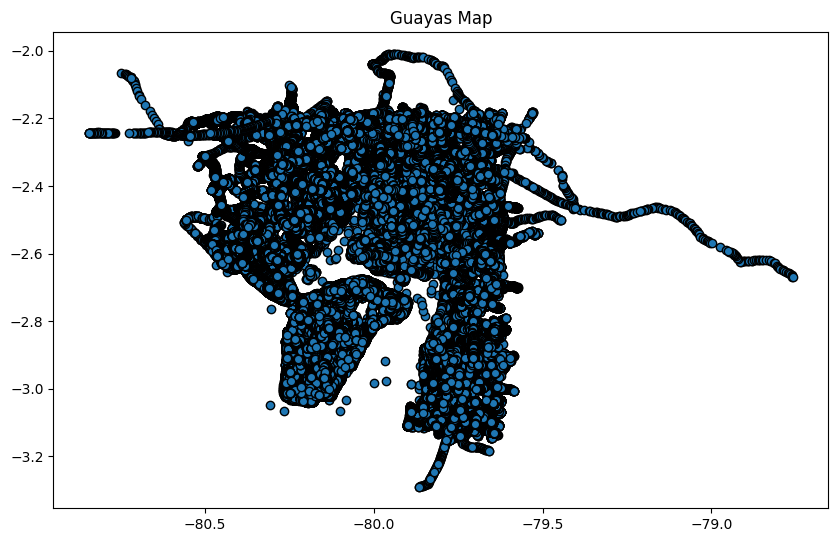

In [12]:
# Plot the data
gdf.plot(figsize=(10, 10), edgecolor="black")
plt.title("Guayas Map")
plt.show()


In [13]:
# Number of features (rows)
print("Number of features:", len(gdf))

# Unique attributes in the dataset
print("Columns:", gdf.columns)

# Count unique values in a specific column
print(gdf['tags'].value_counts())
print(gdf['geometry'].value_counts())


Number of features: 476017
Columns: Index(['id', 'lon', 'lat', 'tags', 'geometry'], dtype='object')
tags
{ }                                                                                                                                           466115
{ "power": "tower" }                                                                                                                            1407
{ "power": "pole" }                                                                                                                              526
{ "junction": "yes" }                                                                                                                            459
{ "access": "private", "barrier": "gate" }                                                                                                       382
                                                                                                                                               ...  
{

In [14]:
# Inspect the first few rows of the 'tags' column
print(gdf['tags'].head())

# Check the data type of the 'tags' column
print(gdf['tags'].dtype)

# Verify a sample row
print(gdf.iloc[0]['tags'])


0    { }
1    { }
2    { }
3    { }
4    { }
Name: tags, dtype: object
object
{ }


In [15]:
# Convert JSON-like strings to dictionaries
gdf['tags'] = gdf['tags'].apply(lambda x: json.loads(x) if isinstance(x, str) and x.strip().startswith('{') else None)

# Verify after parsing
print(gdf['tags'].head())


0    {}
1    {}
2    {}
3    {}
4    {}
Name: tags, dtype: object


In [16]:
# Extract unique tags
unique_tags = set()
for tag_dict in gdf['tags']:
    if isinstance(tag_dict, dict):  # Ensure it's a dictionary
        unique_tags.update(tag_dict.keys())

unique_tags = sorted(unique_tags)

# Display unique tags
print(f"Number of unique tags: {len(unique_tags)}")
print("Unique tags:")
for tag in unique_tags:
    print(tag)


Number of unique tags: 202
Unique tags:
FIXME
abandoned
access
access:swell
access:tide
addr:city
addr:country
addr:full
addr:housename
addr:housenumber
addr:postcode
addr:street
aeroway
air_conditioning
alt_name
amenity
artwork_type
atm
barrier
bench
bicycle
bin
brand
brand:en
brand:es
brand:wikidata
brand:wikipedia
breakfast
building
bus
camera:mount
camera:type
capacity
check_date
check_date:opening_hours
colour
communication:lora
compressed_air
contact:facebook
contact:instagram
contact:mobile
contact:phone
contact:tiktok
couplings
covered
craft
crossing
crossing:island
cuisine
currency:XBT
dance:teaching
denomination
description
design
designation
direction
distance
drive_through
ec:date
ec:import
ec:tipo
ele
email
emergency
entrance
facebook
fax
fee
ferry
fire_hydrant:position
fire_hydrant:type
fitness_station
fixme
foot
ford
fuel:lpg
gns_classification
gns_uni
grooming
harbour
health_facility:type
healthcare
healthcare:speciality
highway
historic
icao
image
industrial
instagram


In [17]:
# Count rows with empty or None tags
empty_tags_count = gdf['tags'].isna().sum()
print(f"Empty or None tags: {empty_tags_count} out of {len(gdf)}")


Empty or None tags: 0 out of 476017


In [18]:
# List of tags to inspect
tags_to_inspect = [
    "contact:facebook", "contact:instagram", "contact:mobile", "contact:phone", 
    "contact:tiktok", "email", "facebook", "instagram", "mobile", 
    "name", "office", "phone", "phone:mobile", "place", "service"
]

# Flatten the 'tags' column into multiple columns
tags_df = gdf['tags'].apply(pd.Series)

# Filter only the specified tags
selected_tags_df = tags_df[tags_to_inspect]

# Display the first few rows
print("First few rows of the selected tags:")
print(selected_tags_df.head())

# Count non-null occurrences for each tag
tag_counts = selected_tags_df.notnull().sum()

# Display counts for each tag
print("\nCounts of non-null values for each tag:")
print(tag_counts)

# Display unique values for each tag
print("\nUnique values for each tag:")
for tag in tags_to_inspect:
    if tag in selected_tags_df:
        unique_values = selected_tags_df[tag].dropna().unique()
        print(f"\n{tag} ({len(unique_values)} unique values):")
        print(unique_values[:10])  # Show up to 10 unique values for brevity


First few rows of the selected tags:
  contact:facebook contact:instagram contact:mobile contact:phone  \
0              NaN               NaN            NaN           NaN   
1              NaN               NaN            NaN           NaN   
2              NaN               NaN            NaN           NaN   
3              NaN               NaN            NaN           NaN   
4              NaN               NaN            NaN           NaN   

  contact:tiktok email facebook instagram mobile name office phone  \
0            NaN   NaN      NaN       NaN    NaN  NaN    NaN   NaN   
1            NaN   NaN      NaN       NaN    NaN  NaN    NaN   NaN   
2            NaN   NaN      NaN       NaN    NaN  NaN    NaN   NaN   
3            NaN   NaN      NaN       NaN    NaN  NaN    NaN   NaN   
4            NaN   NaN      NaN       NaN    NaN  NaN    NaN   NaN   

  phone:mobile place service  
0          NaN   NaN     NaN  
1          NaN   NaN     NaN  
2          NaN   NaN     NaN  
3  

In [24]:
# 1. Name & Email
name_email = selected_tags_df[['name', 'email']].dropna()
print("Preview of Name & Email (non-null):")
print(name_email.head())
print(name_email.shape)
name_email.to_csv("/home/luisvinatea/Dev/Repos/aquaculture/beraqua/data/processed/maps/email_tags.csv")

# 2. Name & Phone
name_phone = selected_tags_df[['name', 'phone']].dropna()
print("\nPreview of Name & Phone (non-null):")
print(name_phone.head())
print(name_email.shape)
name_phone.to_csv("/home/luisvinatea/Dev/Repos/aquaculture/beraqua/data/processed/maps/phone_tags.csv")

# 3. Name & Place
name_place = selected_tags_df[['name', 'place']].dropna()
print("\nPreview of Name & Place (non-null):")
print(name_place.head())
print(name_email.shape)
name_place.to_csv("/home/luisvinatea/Dev/Repos/aquaculture/beraqua/data/processed/maps/place_tags.csv")


Preview of Name & Email (non-null):
                                                     name  \
40077   Iglesia Católica Nuestra Señora de la Caridad ...   
43456   Iglesia Católica Nuestra Señora del Rosario de...   
134699                                    Alexandra Laica   
147828                             UE Sir Francisco Bacon   
147880  Iglesia Católica Nuestra Señora del Cisne | Gu...   

                                        email  
40077            cari_38del_cobre@outlook.com  
43456           iglesiapompeyagye@outlook.com  
134699                Latina-1981@hotmail.com  
147828          uesirfranciscobacon@gmail.com  
147880  parroquiantrasradelcisnegye@gmail.com  
(54, 2)

Preview of Name & Phone (non-null):
                                                    name           phone
40077  Iglesia Católica Nuestra Señora de la Caridad ...     (04)2842933
43436                               International School  +593 4 2445400
43456  Iglesia Católica Nuestra Señora del Ro

In [23]:
# Filter rows where 'place' is 'farm'
farms = gdf[gdf['place'] == 'farm']

# Inspect related key-value pairs for 'farm' in the 'tags' column
related_tags = farms['tags'].dropna()

# Flatten the 'tags' dictionaries for farms
flattened_farms = pd.json_normalize(related_tags)

# Combine with the original GeoDataFrame index for context
flattened_farms.index = farms.index

# Display the first few rows
print("Flattened tags for 'place=farm':")
print(flattened_farms.head())

# Optionally, save the output for further analysis
flattened_farms.to_csv("/home/luisvinatea/Dev/Repos/aquaculture/beraqua/data/processed/maps/farm_tags.csv")


Flattened tags for 'place=farm':
      gns_classification   gns_uni               name place source   wikidata  \
9918                ESTY  -1368408       Estero Bagre  farm    GNS  Q23885585   
9965                ESTY  -1372484      Estero Guanco  farm    GNS  Q23880265   
9992                ESTY  -1378184  Estero Pedernales  farm    GNS  Q23875696   
10014               ESTY  -1381323       Estero Segal  farm    GNS        NaN   
10070                PPL  -1368764        Bola de Oro  farm    GNS        NaN   

                                                   fixme is_in:country  \
9918                                                 NaN           NaN   
9965                                                 NaN           NaN   
9992                                                 NaN           NaN   
10014  Please check/improve the location: a farm mid ...       Ecuador   
10070                                                NaN       Ecuador   

      is_in:country_code           